# PCA vs LDA — IRIS DATASET (With Visualization)

The **Iris dataset** is one of the most famous benchmark datasets in machine learning, created by statistician Ronald Fisher in 1936.

It contains measurements of 150 iris flowers from 3 species.

**1. Number of Samples**

150 flowers total

50 samples per species

**2. Target Classes (Species)**

The flowers belong to 3 species:

Target Value	Species Name
0	Iris Setosa
1	Iris Versicolor
2	Iris Virginica

**3. Features (4 total)**

All features are numerical and measured in centimeters.

Feature	Meaning

1. Sepal Length	Length of the sepal

2. Sepal Width	Width of the sepal

3. Petal Length	Length of the petal

4. Petal Width	Width of the petal

**4. Problem Type**

The dataset is used for:

    Multiclass classification (3 classes)

    Clustering

    Dimensionality reduction (PCA, LDA)

# Import Libraries and Load Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

In [2]:
# Load dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 2 Components

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.72962445 0.22850762]


In [5]:
df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_pca['target']=y
df_pca

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


# Plot PCA

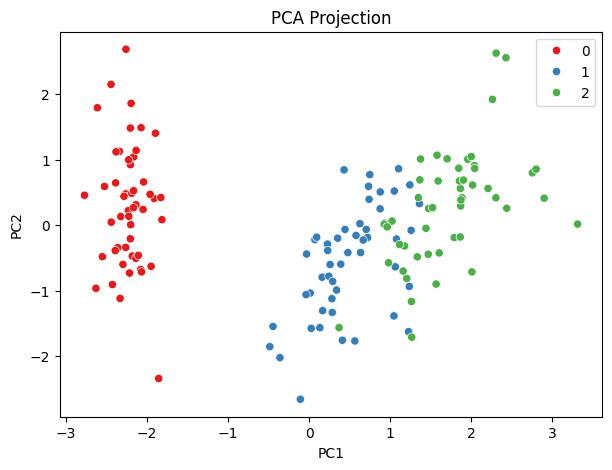

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca,x='PC1', y='PC2', hue=y, palette="Set1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.legend(loc='best')
plt.show()

# LDA with 2 Components

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
df_lda=pd.DataFrame(data=X_lda, columns=['PC1','PC2'])
df_lda['target']=y

# Plot LDA

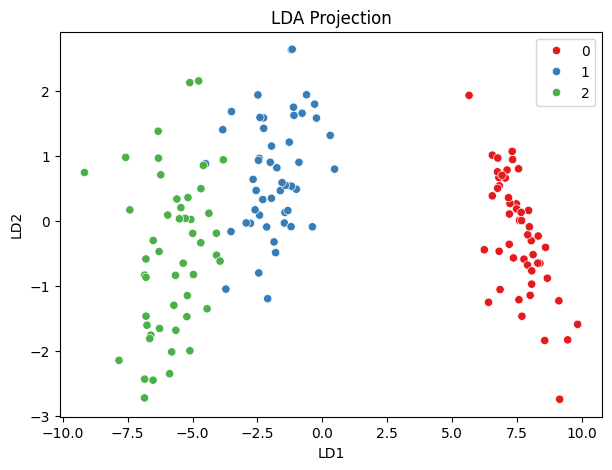

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_lda, x='PC1',y='PC2', hue='target', palette='Set1')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection")
plt.legend()
plt.show()

# Plot PCA & LDA Side By Side for better Visualization.

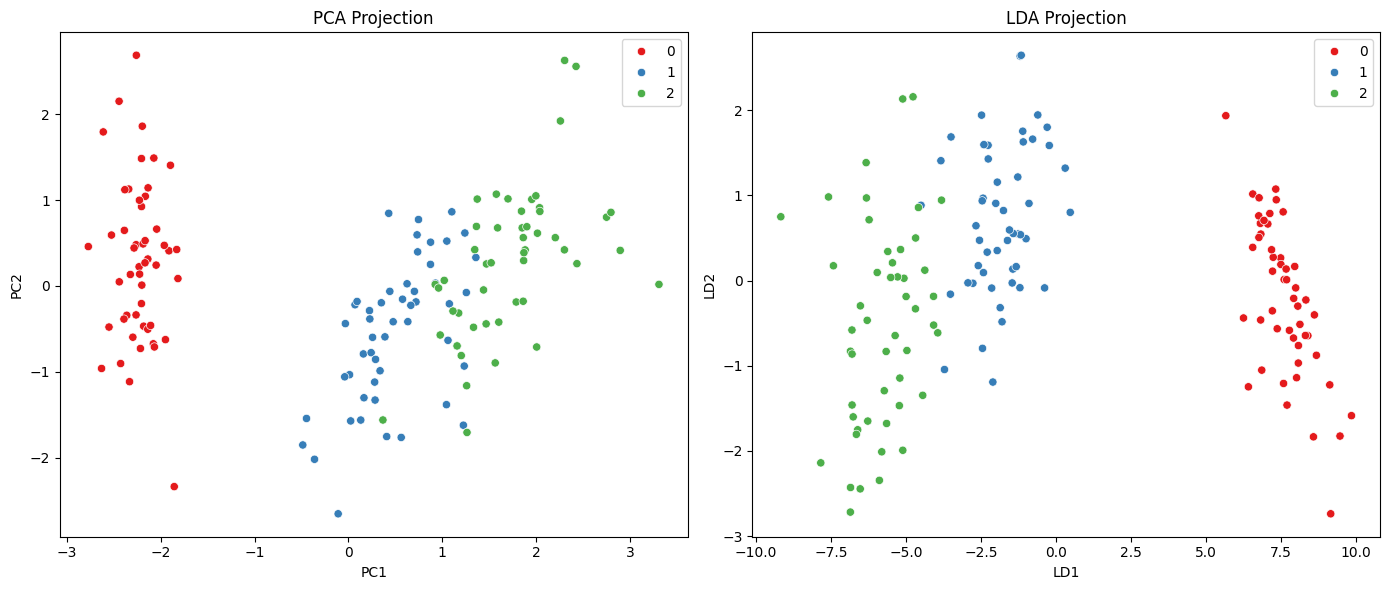

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y, palette='Set1', ax=axes[0])
axes[0].set_title('PCA Projection')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(loc='best')

sns.scatterplot(data=df_lda, x='PC1', y='PC2', hue='target', palette='Set1', ax=axes[1])
axes[1].set_title('LDA Projection')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

# What You Will See in Plots
* PCA Plot

    Points will be spread out along directions of maximum variance.

    Class separation is NOT the goal, so clusters may overlap.

* LDA Plot

    Points of each class will be much more separated.

    Because LDA explicitly maximizes between-class separation.

# Key Takeaway (Visually)

    PCA: Best for reducing dimensions while keeping information

    LDA: Best for classification tasks to separate classes